# **Lecture 7:  Optimization Methods in Finance**
Olivier Rubel, PhD

Professor of Marketing and Analytics

UC Davis

Analytic Decision Making -- MSBA Program

1. Introduction to Portfolio Optimization
2. Simulation
3. Optimization
4. Simulation again (but something else)
5. Estimation of returns
6. Optimization with estimated results


# **Portfolio Optimization**
There are several ways of doing portfolio optimization. We are going to first consider the following problem. You want to minimize the risk of a portfolio while imposing a minimum return. (see Chapter 8 in the document on Canvas, in Lecture 8's folder)

Notation:


*   $x_i$ is the share of your portfolio that is allocated to stock $i$
*   The returns follow a multivariate Normal distribution, i.e., r~$N(\mu,\Sigma)$
* $R$ is the mininum return you want to have



\begin{align}
\text{Minimize} \quad \frac{1}{2} x^T & \Sigma x\\
\text{s.t.}\quad \mu^T x &\geq R\\
\sum_{i}^{}x_i&=1\\
x&\geq0
\end{align}




You want to optimize the the composition of your portfolio comprised of only major tech companies, i.e.,

* Amazon

* Apple

* eBay

* Facebook

* Google




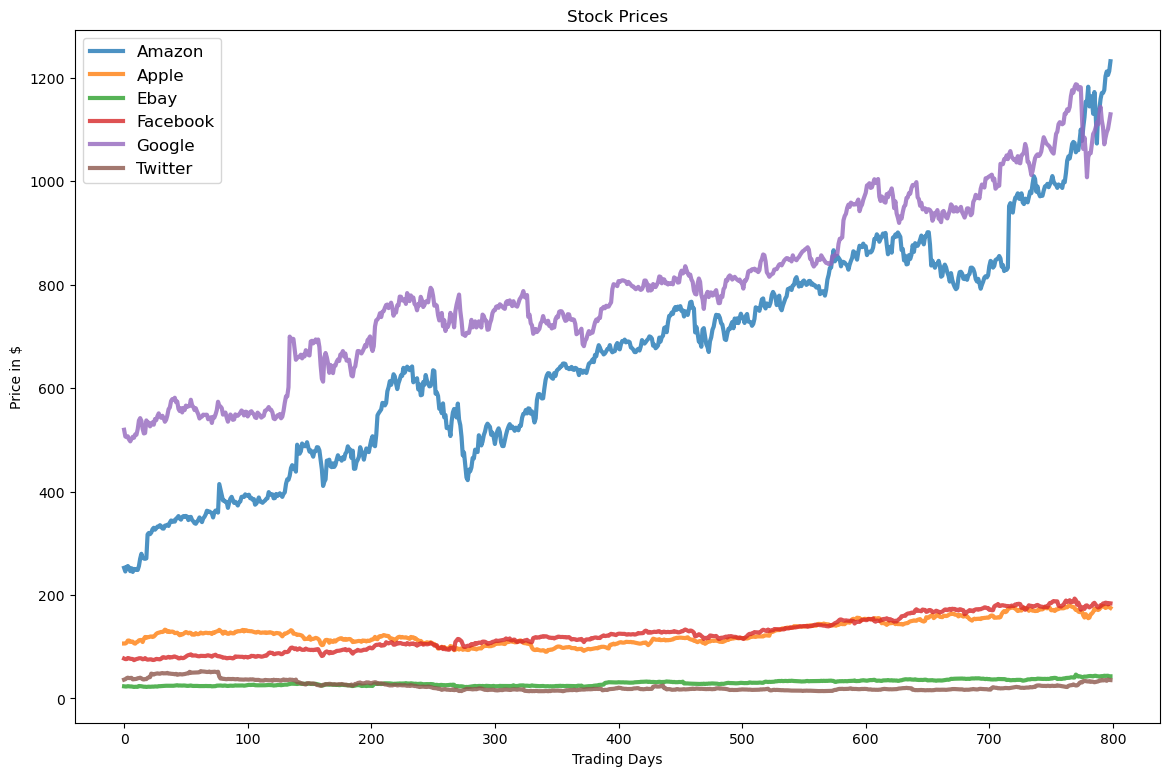

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
## Set Styles
#plt.style.use('fivethirtyeight')
#%config InlineBackend.figure_format = 'retina'
df= pd.read_csv('https://raw.githubusercontent.com/ormarketing/finance/master/datahomework2.csv')
df.head()
plt.figure(figsize=(14,9))
for c in df.columns.values:
    plt.plot(df.index, df[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.title('Stock Prices')
plt.ylabel('Price in $')
plt.xlabel('Trading Days')
plt.show()

# **Portfolio Optimization**

In [73]:
#!pip install cvxpy
import numpy as np
import math
import cvxpy as cvx
from numpy import matrix
from cvxpy import *
R=0.15/250 #Daily return, i.e., 15% over the year, with 250 trading days
mu=matrix([0.00183,0.0005,0.00064,0.00093,0.00081])
Cov=matrix([[0.000410273, 2.60E-06,1.01688E-05,-1.11913E-05,4.33E-06],[2.60E-06,0.000213984, 5.96877E-05,6.53986E-05, 5.68801E-05],[1.01688E-05,5.96877E-05, 0.000290081, 2.57951E-05, 5.41419E-05],[-1.11913E-05, 6.53986E-05, 2.57951E-05, 0.000255913, 9.74451E-05],[4.33E-06, 5.68801E-05,5.41419E-05, 9.74451E-05,0.000209841]])
x=cvx.Variable(5)
risk=quad_form(x, Cov)#create x'\Sigma x, the risk of the portfolio, where \Sigma is the variance-covariance matrix of returns (Cov above)
rr=sum(mu@x)#create \mu' x
prob1 = Problem(Minimize(risk ),
               [rr>=R,sum(x) == 1,
                x >= 0])
prob1.solve()
print(x.value)

[0.2020792  0.23037082 0.18159063 0.18349399 0.20246536]


# **What is the value of my portfolio?**

In [74]:
mu

matrix([[0.00183, 0.0005 , 0.00064, 0.00093, 0.00081]])

# **Stock price evolution**

$r_i(t)$ is the daily return of a stock at time $t$, which is assumed Normally distributed. So at each instant, there is uncertainty about what would be the return on the next day, and the day after, and the day after and so on.

So if I invest $\$1$ today ($t=0$) in stock $i$, the value of the stock tomorrow is uncertain, i.e., it's $1\times (1+r_i(1))$. So the value of my $\$1$  portfolio $V(t)$ at time $t={0,1,...,n}$ is:


*   at $t=0$: $V(0)=1$ (this is the money I have invested)
*   at $t=1$: $V(1)=1\times (1+r(1))$
*  at $t=2$: $V(2)=1\times (1+r(1))\times (1+r(2))$
* at $t=3$: $V(3)=1\times (1+r(1))\times (1+r(2))\times \left(1+r(3)\right)$


and so on. So at $t=0$, I do not know the sequence of $r_i(t)$.

Below, we create one possible future everytime when we compile the code




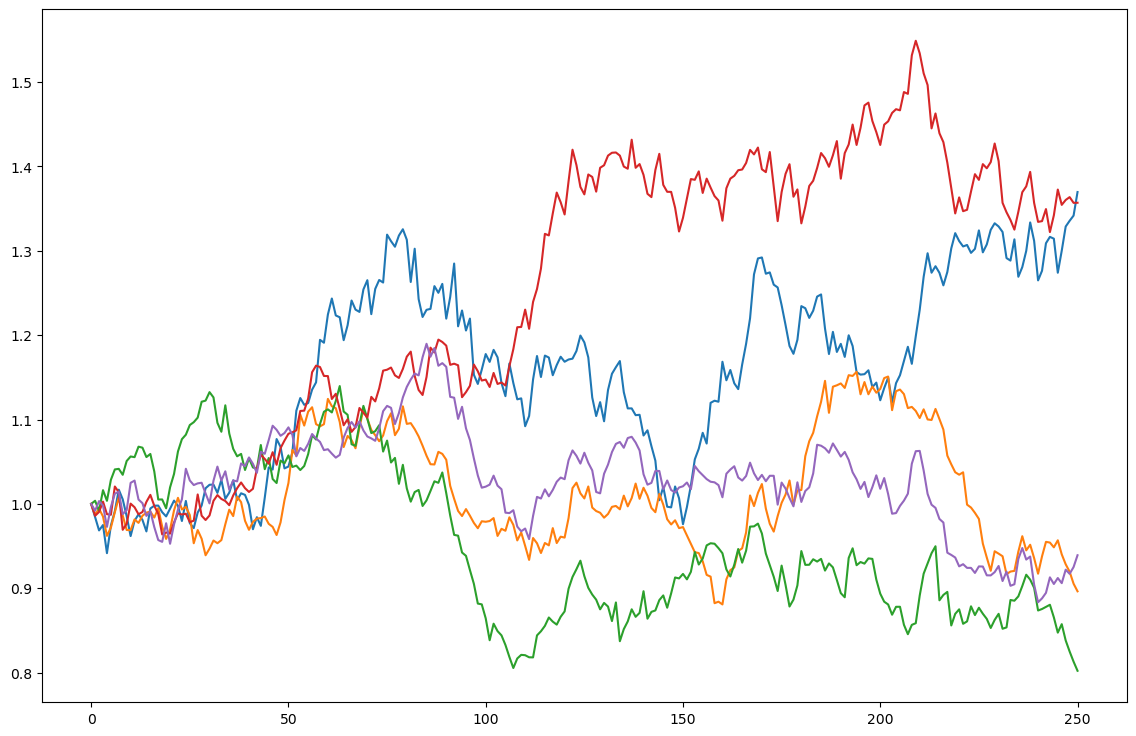

In [18]:
#Simulating one state of the world to come
import numpy as np
import math
from numpy import matrix
T = 250 # number of trading days
mu=[0.00183,0.0005,0.00064,0.00093,0.00081]
Cov=matrix([[0.000410273, 2.60E-06,1.01688E-05,-1.11913E-05,4.33E-06],[2.60E-06,0.000213984, 5.96877E-05,6.53986E-05, 5.68801E-05],[1.01688E-05,5.96877E-05, 0.000290081, 2.57951E-05, 5.41419E-05],[-1.11913E-05, 6.53986E-05, 2.57951E-05, 0.000255913, 9.74451E-05],[4.33E-06, 5.68801E-05,5.41419E-05, 9.74451E-05,0.000209841]])
m=5
y = np.zeros((T+1,m))
y[0]=[1,1,1,1,1]
for i in range(T):
    rr=np.random.multivariate_normal(mu,Cov)
    y[i+1]=y[i]*(1+rr)


plt.figure(figsize=(14,9))
plt.plot(y)
plt.show()

In [23]:
y
# sum(map(sum, y))

import numpy as np
data = np.array(y)
sum(data.sum(axis=1).tolist())

1356.5894634687386

# **Simulations**

Now we are compute 100 (i.e., number of simulations) possible futures.

6.205075823238843

In [54]:
# Simulation of 100 paths
paths = []
for sim in range(100):
    y = np.zeros((T+1,m))
    y[0]=[100,100,100,100,100]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    data=np.array(y)
    total_returns = data[[-1]].sum()
    paths.append(total_returns)
    



,final
count,100.000000
mean,647.527129
std,102.363727
min,437.169552
25%,576.279781
50%,634.549539
75%,693.783029
max,989.562034


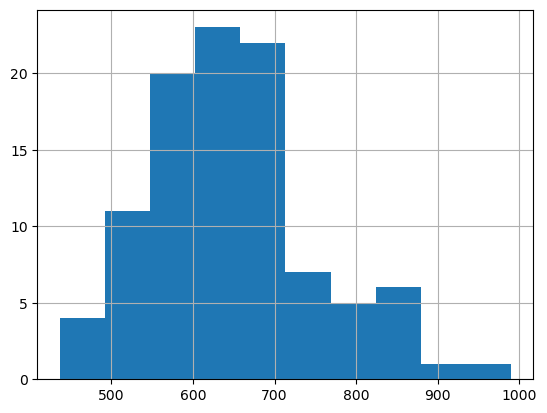

In [55]:
##Here we create a distribution of returns
import pandas as pd

df = pd.DataFrame({"final":paths})
df['final'].hist()

df.describe()

# Estimating Returns and Risk

The vector of returns and variance-covariance matirix were provided as is. However, in practice, one needs to estimate $\mu$ and $\Sigma$.

To do so, we need to following the following steps (see pp.144-145 in the document posted in the folder for Lecture 7).

1. We need to get the data (i.e., time series in this case) of stock prices.

2. Then we need to estimate the rates of returns $r_{it}$ of stock $i$ at time $t$, i.e.,

\begin{equation}
r_{it}=\frac{I_{i,t}-I_{i,t-1}}{I_{i,t-1}},
\end{equation}

where $I_{i,t}$ is the stock value at $i$ at time $t$

3. We estimate the average return as $\mu_i$ as
\begin{equation}
\mu_i=\left(\prod_{t=1}^{T}\left(1+r_{it}   \right)      \right)^{\frac{1}{T}}-1
\end{equation}

4. We estimate the variance-covariance matrix, i.e.,

\begin{equation}
cov\left(R_i,R_j\right)=\frac{1}{T}\sum_{t=1}^{T}\left( r_{it}-\bar{r_{it}}  \right)\left( r_{jt}-\bar{r_{jt}}  \right),
\end{equation}
where
\begin{equation}
\bar{r_{it}}=\frac{1}{T}\sum_{t=1}^{T}r_{it}
\end{equation}


Let's try to do it!

Hint: numpy can do most of the estimation automatically

In [ ]:
#Load the data from github
#note that here we have twitter
df= pd.read_csv('https://raw.githubusercontent.com/ormarketing/finance/master/datahomework2.csv')
df.head()

In [ ]:
#Here we append to the dataframe the returns r_{it}


In [11]:
# Using built-in geometric mean function, estimate mu and variance-covariance matrix


In [ ]:
#Next, I redo the optimization


# **Loading data from the Internet**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 22.8 MB/s eta 0:00:0000:0100:01
  Created wheel for frozendict: filename=frozendict-2.4.4-cp38-cp38-macosx_10_9_x86_64.whl size=37802 sha256=1725e62a734324a35d146e7e83bf181fb8776f0d2f460b2411e9d9dd3106aa85
  Stored in directory: /Users/rishikesanravichandran/Library/Caches/pip/wheels/7d/65/20/a8f7d1a2a99c9db2dfb0f83dddac9e847b02f45040768bf264
  

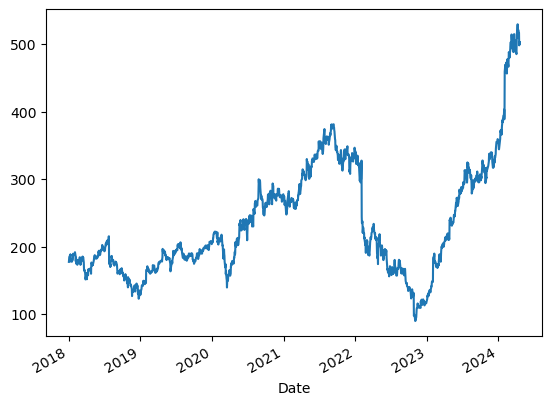

In [50]:
!pip install yfinance
import yfinance as yf
tickerSymbol = 'META'
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
df = tickerData.history(period='1d', start='2018-1-1', end='2024-4-22')
#see your data
df['Open'].plot()
plt.show()

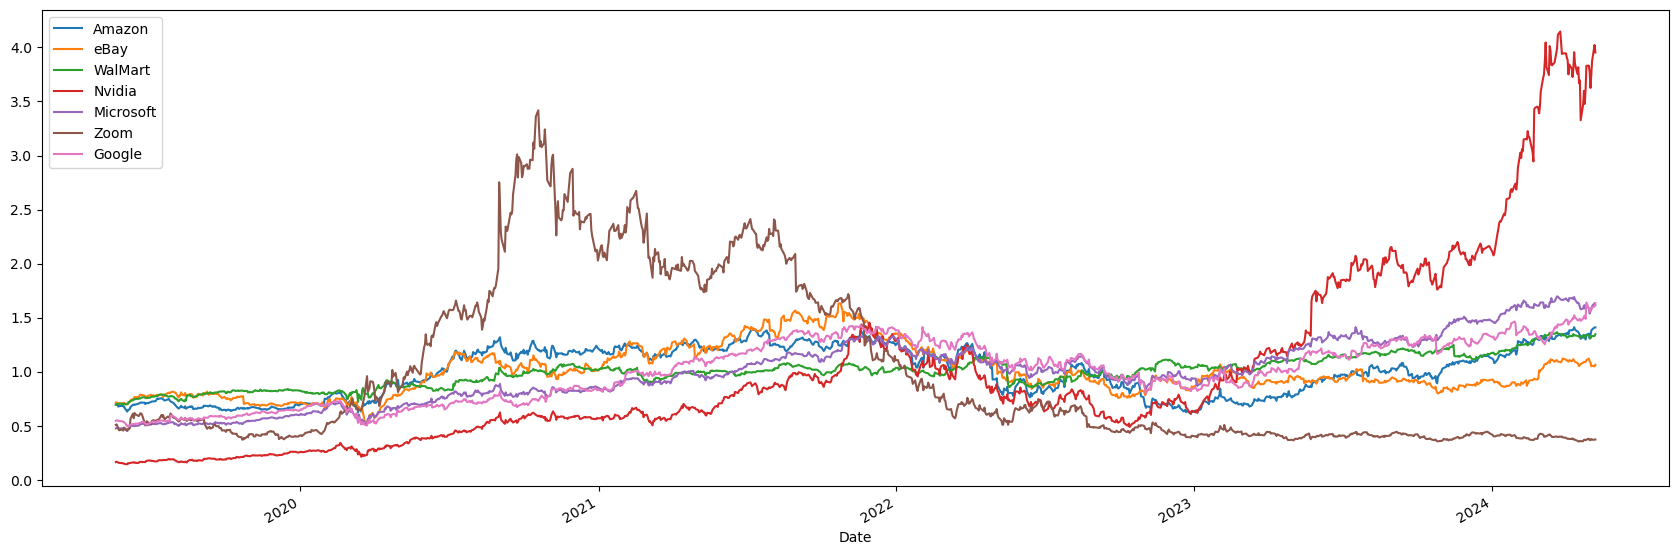

In [76]:
Start='2019-5-20'
End='2024-5-8'
amazon = yf.Ticker('AMZN').history(period='1d', start=Start, end=End)['Close']
ebay=yf.Ticker('EBAY').history(period='1d', start=Start, end=End)['Close']
WalMart=yf.Ticker('WMT').history(period='1d', start=Start, end=End)['Close']
nvidia=yf.Ticker('NVDA').history(period='1d', start=Start, end=End)['Close']
microsoft=yf.Ticker('MSFT').history(period='1d', start=Start, end=End)['Close']
zoom=yf.Ticker('ZM').history(period='1d', start=Start, end=End)['Close']
google=yf.Ticker('GOOGL').history(period='1d', start=Start, end=End)['Close']

data=[amazon,ebay,WalMart,nvidia,microsoft,zoom,google]
plt.figure(figsize=(21,7))
(data[0]/np.mean(data[0])).plot()
(data[1]/np.mean(data[1])).plot()
(data[2]/np.mean(data[2])).plot()
(data[3]/np.mean(data[3])).plot()
(data[4]/np.mean(data[4])).plot()
(data[5]/np.mean(data[5])).plot()
(data[6]/np.mean(data[6])).plot()
plt.legend(['Amazon', 'eBay','WalMart','Nvidia','Microsoft','Zoom','Google'])
plt.show()

In [77]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the date range
start = '2019-5-20'
end = '2024-5-8'

# Define the stock symbols
symbols = ['AMZN', 'EBAY', 'WMT', 'NVDA', 'MSFT', 'ZM', 'GOOGL']

# Retrieve historical closing prices
data = pd.concat(
    [yf.Ticker(symbol).history(period='1d', start=start, end=end)['Close'].rename(symbol) for symbol in symbols],
    axis=1
)

# Calculate returns
returns = data.pct_change().dropna()

# Calculate geometric mean return
geometric_mean_returns = ((1 + returns).prod())**(1/returns.shape[0]) - 1

# Calculate covariance matrix of returns
covariance_matrix = returns.cov()

print("Geometric Mean Returns:")
print(geometric_mean_returns)
print("\nCovariance Matrix of Returns:")
print(covariance_matrix)


Geometric Mean Returns:
AMZN     0.000567
EBAY     0.000319
WMT      0.000527
NVDA     0.002547
MSFT     0.000978
ZM      -0.000247
GOOGL    0.000877
dtype: float64

Covariance Matrix of Returns:
           AMZN      EBAY       WMT      NVDA      MSFT        ZM     GOOGL
AMZN   0.000493  0.000205  0.000094  0.000441  0.000292  0.000327  0.000293
EBAY   0.000205  0.000425  0.000085  0.000282  0.000181  0.000206  0.000167
WMT    0.000094  0.000085  0.000193  0.000126  0.000106  0.000068  0.000088
NVDA   0.000441  0.000282  0.000126  0.001083  0.000445  0.000439  0.000412
MSFT   0.000292  0.000181  0.000106  0.000445  0.000368  0.000220  0.000294
ZM     0.000327  0.000206  0.000068  0.000439  0.000220  0.001413  0.000214
GOOGL  0.000293  0.000167  0.000088  0.000412  0.000294  0.000214  0.000412


In [78]:
matrix(geometric_mean_returns.values.tolist())

matrix([[ 0.00056691,  0.00031864,  0.00052721,  0.00254676,  0.00097818,
         -0.00024747,  0.00087718]])

In [94]:
from pandas import DataFrame
from scipy import stats
##Compute mu and variance-covariance matrix with the new data
## Optimize your portfolio

R=0.10/250 #Daily return, i.e., 15% over the year, with 250 trading days
mu=matrix(geometric_mean_returns.values)
Cov=matrix(covariance_matrix.values)
x=cvx.Variable(7)
risk=quad_form(x, Cov)#create x'\Sigma x, the risk of the portfolio, where \Sigma is the variance-covariance matrix of returns (Cov above)
rr=sum(mu@x)#create \mu' x
prob1 = Problem(Minimize(risk ),
               [rr>=R,sum(x) == 1,
                x >= 0])
prob1.solve()
print(symbols)
print(x.value)

result = pd.DataFrame({"Stock":symbols,"Portfolio":x.value})
result

['AMZN', 'EBAY', 'WMT', 'NVDA', 'MSFT', 'ZM', 'GOOGL']
[1.51006199e-02 1.50640901e-01 6.44508408e-01 3.04391899e-18
 2.89829656e-02 2.93896020e-02 1.31377503e-01]


,Stock,Portfolio
0,AMZN,1.510062e-02
1,EBAY,1.506409e-01
2,WMT,6.445084e-01
3,NVDA,3.043919e-18
4,MSFT,2.898297e-02
5,ZM,2.938960e-02
6,GOOGL,1.313775e-01


In [92]:
mu.flatten()

mu = [0.00056691,0.00031864,0.00052721,0.00254676,0.00097818,-0.00024747,0.00087718]

,final
count,100.000000
mean,848.938381
std,219.431441
min,499.200699
25%,694.953549
50%,817.634627
75%,990.561697
max,1559.699983


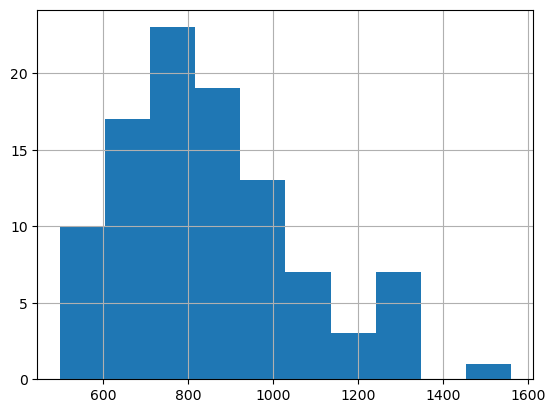

In [90]:
T = 250 # number of trading days

m=7
y = np.zeros((T+1,m))

paths = []
for sim in range(100):
    y = np.zeros((T+1,m))
    y[0]=[100,100,100,100,100,100,100]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    data=np.array(y)
    total_returns = data[[-1]].sum()
    paths.append(total_returns)

import pandas as pd

df = pd.DataFrame({"final":paths})
df['final'].hist()

df.describe()


# **Simulate the value of your portfolio 250 days from now**

In [ ]:
##Here we create a distribution of returns
#Simulate the value of your portfolio 250 days from now

# **Same Thing with SciPy**

In [ ]:
import numpy as np
from scipy.optimize import minimize
# function to calculate the risk measure (riskm)
def riskm(x):
      """This is the utility"""
      return 1000*np.dot(np.dot(x.T,Cov),x)
R=0.15/252
xi=np.zeros(7)
cons1={'type':'eq','fun':lambda x:np.sum(x)-1}
cons2={'type':'ineq','fun':lambda x:np.dot(mu.T,x)-R}
bnds = ((0, None),(0, None),(0, None),(0, None),(0, None),(0, None),(0, None))
# Solving the optimization problem
sol = minimize(riskm,xi,constraints=(cons1,cons2),bounds=bnds)
print("The optimal allocation for each stock is\n",sol.x*100)

# **Portfolio Optimization with a Utility Function**

In [ ]:
from pandas import DataFrame
rr0=np.array(((data[0]-data[0].shift(1))/data[0].shift(1))[1:217])
rr1=np.array(((data[1]-data[1].shift(1))/data[1].shift(1))[1:217])
rr2=np.array(((data[2]-data[2].shift(1))/data[2].shift(1))[1:217])
rr3=np.array(((data[3]-data[3].shift(1))/data[3].shift(1))[1:217])
rr4=np.array(((data[4]-data[4].shift(1))/data[4].shift(1))[1:217])
rr5=np.array(((data[5]-data[5].shift(1))/data[5].shift(1))[1:217])
rr6=np.array(((data[6]-data[6].shift(1))/data[6].shift(1))[1:217])
rr=DataFrame(np.transpose([rr0,rr1,rr2,rr3,rr4,rr5,rr6]))
mu = stats.gmean(1+rr)-1
Cov = matrix((rr).cov())
x=cvx.Variable(7)
risk=quad_form(x, Cov)
gamma=10
Utility=mu.T@x-gamma*risk
prob2 = Problem(Maximize(Utility),
               [sum(x) == 1,
                x >= 0])
prob2.solve()

print(round(x.value[0]*100),round(x.value[1]*100),round(x.value[2]*100),round(x.value[3]*100),round(x.value[4]*100),round(x.value[5]*100),round(x.value[6]*100))

# Other file

From the makers of CVX

https://colab.research.google.com/github/cvxgrp/cvx_short_course/blob/master/applications/portfolio_optimization.ipynb#scrollTo=Ap-SxEzfG4UZ